Importation des bibliothèques
Pandas pour gérer l'importation
Spacy pour faire le nettoyage
en_core_web_sm pour gérer la bibliothèque de mot en anglais
Wordcloud pour créer un nuage de mot
Matplot pour créer des graphiques
CountVectorizer a la même fonction que Spacy, je la garde au cas où avec une fonction particulière pour vectoriser a nouveau
Time pour gérer le temps
TextBlob pour voir la polarité (.sentiment.polarity)
from langdetect import detect_langs pour détecter la langue

En cas de besoin
#pip install spacy
#python -m spacy download en_core_web_sm
nltk.download('wordnet')

aws['langue'] = aws.review.apply(detect_langs) => ne fonctionne pas, il dit qu'il ne 


In [1]:
import pandas as pd
import re
import spacy
import en_core_web_sm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from time import time
import numpy as np
from textblob import TextBlob

#Test lang detect a échoué
#from langdetect import detect_langs
#import langdetect

#test nltk a échoué
#import nltk
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('wordnet')
#from nltk.stem import PorterStemmer, WordNetLemmatizer
#from nltk import word_tokenize
#from nltk.corpus import stopwords
#import re


In [2]:
aws = pd.read_csv("pr_10k.csv",sep=";",header=0)

In [3]:
print(aws.head(10))
print(" ")
print("Type présent dans le dataframe")
print(aws.dtypes)
print("Infos générales du dataframe")
print(aws.info())
print(" ")

length_reviews = aws.review.str.len()

print("Mesure des commentaires")
print("Taille maximum d'un commentaire : "  + str(max(length_reviews)))
print("Taille minimum d'un commentaire : " + str(min(length_reviews)))
print(" ")

                                                name  \
0                Annas Dream Full Quilt with 2 Shams   
1  Stop Pacifier Sucking without tears with Thumb...   
2  Stop Pacifier Sucking without tears with Thumb...   
3  Stop Pacifier Sucking without tears with Thumb...   
4            A Tale of Baby's Days with Peter Rabbit   
5  Baby Tracker&reg, - Daily Childcare Journal, S...   
6  Baby Tracker&reg, - Daily Childcare Journal, S...   
7  Baby Tracker&reg, - Daily Childcare Journal, S...   
8  Baby Tracker&reg, - Daily Childcare Journal, S...   
9  Baby Tracker&reg, - Daily Childcare Journal, S...   

                                              review sentiment  
0  Very soft and comfortable and warmer than it l...  positive  
1  This is a product well worth the purchase.  I ...  positive  
2  All of my kids have cried non-stop when I trie...  positive  
3  When the Binky Fairy came to our house, we did...  positive  
4  Lovely book, it's bound tightly so you may not...  posi

In [4]:
print(aws.groupby(['sentiment']).count())

           name  review
sentiment              
negative   2111    2107
positive   7885    7869


In [5]:
aws = aws.drop(['name'],axis=1)
aws =aws.dropna()

In [6]:
aws['Token'] = aws['review'].str.lower()

In [7]:
nlp = en_core_web_sm.load()
t=time()
aws['Token'] = aws['Token'].apply(nlp)
t1=time()
print("NLP : " + str(t1-t))

NLP : 190.72276401519775


In [30]:
#test
#Gérer l'émoticone
print(aws.iloc[32,2])
print(' ')
#Rien de spécial
print(aws.iloc[217,2])
print(' ')
#Commentaire négatif mais cela ne ressort pas clairement a part peut être maybe
print(aws.iloc[218,2])
print(' ')
#Commentaire intéressant car il mèle négatif et positif alors que le tag est positif
print(aws.iloc[424,2])
print(' ')
#Overprice est interessant dans ce commentaire négatif mais également les chiffres et les symboles
print(aws.iloc[547,2])
print(' ')
#Que des chiffres
print(aws.iloc[1288,2])
print(' ')

my son likes brushing elmo's teeth. almost too nice of a book to let the kids play with haha :)
 
my 10 month old grandson thought the movement of this toy was funny! he laughs when it moves! saying this, he does put it in his mouth but pulls it out to laugh so, i love this teether because it makes him so happy not because it massages his teeth!
 
my four month old started teething around two months, he has pretty impressive motor skills when it comes to using his hands but this teether is huge and you really have to apply quite a bit of pressure for it to vibrate. my other son who is two and also teething shows absolutely no intrest in this at all. maybe in a couple more months....
 
i highly recommend this item.  it is a must!  i registered for the diaper genie and used it for about a week and couldn't stand it.  it broke,the refills are expensive and very hard to install.  then i got the diaper champ.  what a difference.  easy to use, just one hand, and no odors.  it uses just your 

In [10]:
keep=['VERB','ADJ', 'ADV']
stopwords = spacy.lang.en.stop_words.STOP_WORDS
t=time()
#aws['Lemma'] = aws['clean review'].apply(lambda x:[token.lemma_ for token in x])
#aws['Pos'] = aws['clean review'].apply(lambda x:[token.pos_ for token in x])

aws['clean review'] = aws['Token'].apply(lambda x:[token.lemma_ for token in x if token.text.isalpha() and token.pos_ in keep and token not in stopwords])
t1=time()
print("Token :" +str(t1-t))

Token :1.2949252128601074


In [22]:
#test
print(aws.head())
print(' ')
#Gérer l'émoticone
print(aws.iloc[32,2])
print(aws.iloc[32,1])
print(' ')
#Rien de spécial
print(aws.iloc[217,2])
print(aws.iloc[217,1])
print(' ')
#Commentaire négatif mais cela ne ressort pas clairement a part peut être maybe
print(aws.iloc[218,2])
print(aws.iloc[218,1])
print(' ')
#Commentaire intéressant car il mèle négatif et positif alors que le tag est positif
print(aws.iloc[424,2])
print(aws.iloc[424,1])
print(' ')
#Overprice est interessant dans ce commentaire négatif mais également les chiffres et les symboles
print(aws.iloc[547,2])
print(aws.iloc[547,1])
print(' ')
#Que des chiffres
print(aws.iloc[1288,2])
print(aws.iloc[1288,1])
print(' ')
print(aws.info())
print(' ')

#Pb avec ligne 3670 et 3963 en espagnol, 1294 en caractère, 6093 #nom?


                                              review sentiment  \
0  Very soft and comfortable and warmer than it l...  positive   
1  This is a product well worth the purchase.  I ...  positive   
2  All of my kids have cried non-stop when I trie...  positive   
3  When the Binky Fairy came to our house, we did...  positive   
4  Lovely book, it's bound tightly so you may not...  positive   

                                               Token  \
0  (very, soft, and, comfortable, and, warmer, th...   
1  (this, is, a, product, well, worth, the, purch...   
2  (all, of, my, kids, have, cried, non, -, stop,...   
3  (when, the, binky, fairy, came, to, our, house...   
4  (lovely, book, ,, it, 's, bound, tightly, so, ...   

                                        clean review  len  empty  
0  [very, soft, comfortable, warm, look, fit, ful...   14  False  
1  [product, well, worth, purchase, find, else, p...   31  False  
2  [kid, cry, non, stop, when, try, ween, pacifie...   32  False 

In [11]:
aws['len'] = aws['clean review'].apply(lambda x : len(x))
aws['empty']= aws['clean review'].apply(lambda x : bool(len(x) == 0))


print(aws.iloc[1288])
print(' ')
print(aws.groupby(['empty']).count())
print(' ')
print(aws.loc[aws['empty'] == True])

length_clean_reviews = aws['clean review'].str.len()

print("Mesure des commentaires")
print("Taille maximum d'un commentaire : "  + str(max(length_clean_reviews)))
print("Taille minimum d'un commentaire : " + str(min(length_clean_reviews)))
print(" ")


review          &#1047,&#1072,&#1084,&#1077,&#1095,&#1072,&#10...
sentiment                                                positive
Token           (&, #, 1047,&#1072,&#1084,&#1077,&#1095,&#1072...
clean review                                                   []
len                                                             0
empty                                                        True
Name: 1294, dtype: object
 
       review  sentiment  Token  clean review   len
empty                                              
False    9969       9969   9969          9969  9969
True        7          7      7             7     7
 
                                                 review sentiment  \
246                            A favorite in our house!  positive   
1294  &#1047,&#1072,&#1084,&#1077,&#1095,&#1072,&#10...  positive   
1492                                    Big pak N play.  positive   
3670  Los productos avent son los mejores para darle...  positive   
3963  Muy comodas y p

In [38]:
#Nettoyage des tokens vides
aws =  aws.drop(aws[aws['empty'] == True].index)
print(aws.groupby(['empty']).count())
print(' ')
print(aws.loc[aws['empty'] == True])

       review  sentiment  Token  clean review   len  polarity
empty                                                        
False    9969       9969   9969          9969  9969      9969
 
Empty DataFrame
Columns: [review, sentiment, Token, clean review, len, empty, polarity]
Index: []


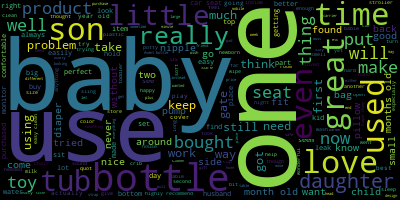

In [13]:
#Générer une longue chaine de caractère
s = " "
long_string = s.join(aws['review'])

#Générer un nuage de mot
wordcloud = WordCloud()
wordcloud.generate(long_string)

#Visualiser le nuage
wordcloud.to_image()


In [12]:
#Transformer clean review en chaine de caractère
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele + " "   
    
    # return string   
    return str1 

aws['clean review'] = aws['clean review'].apply(lambda x: listToString(x))

In [19]:
Générer un nuage de mot après correction

SyntaxError: invalid syntax (<ipython-input-19-948f89371b06>, line 1)

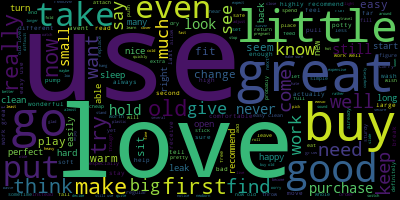

In [15]:
#Générer une longue chaine de caractère
s = " "
clean_string = s.join(aws['clean review'])

#Générer un nuage de mot
wordcloud = WordCloud()
wordcloud.generate(clean_string)

#Visualiser le nuage
wordcloud.to_image()


In [13]:
#Visualisation des mots les plus communs
def plot_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.title('Les 30 mots les plus communs')
    plt.show()



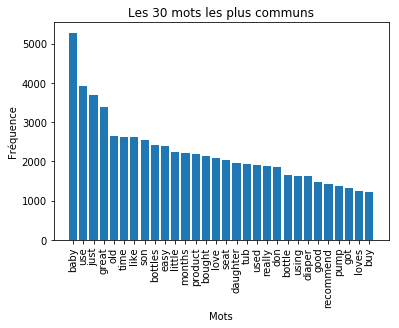

In [14]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform 
count_data = count_vectorizer.fit_transform(aws['review'])

# Visualise
plot_most_common_words(count_data, count_vectorizer)

In [ ]:
Visualisation des mots les plus communs après nettoyage

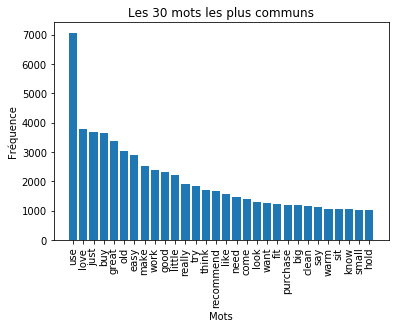

In [15]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform 
count_data = count_vectorizer.fit_transform(aws['clean review'])

# Visualise
plot_most_common_words(count_data, count_vectorizer)

In [16]:
vect = CountVectorizer(stop_words='english')
vect.fit(aws['clean review'])
test= vect.transform(aws['clean review'])
my_array = test.toarray()
test_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
print(test_df.head())
print(test_df.loc[test_df.zippered == 1])
print(' ')
print(aws.iloc[5441,2])
print(' ')

   abandon  abate  abdominal  abide  abilitie  able  ablt  abnormal  \
0        0      0          0      0         0     0     0         0   
1        0      0          0      0         0     0     0         0   
2        0      0          0      0         0     0     0         0   
3        0      0          0      0         0     0     0         0   
4        0      0          0      0         0     1     0         0   

   abnormally  aborb  ...  ze  zealous  zip  ziplock  zipper  zippered  zippy  \
0           0      0  ...   0        0    0        0       0         0      0   
1           0      0  ...   0        0    0        0       0         0      0   
2           0      0  ...   0        0    0        0       0         0      0   
3           0      0  ...   0        0    0        0       0         0      0   
4           0      0  ...   0        0    0        0       0         0      0   

   ziptie  zone  zoom  
0       0     0     0  
1       0     0     0  
2       0     

In [ ]:
Taille de l'entrée : 
Si j'utilise les bigrammes => CountVectorizer(ngram_range  = (1,2), stop_words='english')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Columns: 102954 entries, abandon to zoom wrong
dtypes: int64(102954)
memory usage: 7.7 GB
    
Sans bigramme
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Columns: 6126 entries, abandon to zoom
dtypes: int64(6126)
memory usage: 466.3 MB
    
Possibilité d'utiliser le test du chi 2 pour prendre les features les plus intéressante ?


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Columns: 6126 entries, abandon to zoom
dtypes: int64(6126)
memory usage: 466.3 MB


In [23]:
#print(vect.get_feature_names())

In [18]:
aws['polarity'] = aws['clean review'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(aws.head())

                                              review sentiment  \
0  Very soft and comfortable and warmer than it l...  positive   
1  This is a product well worth the purchase.  I ...  positive   
2  All of my kids have cried non-stop when I trie...  positive   
3  When the Binky Fairy came to our house, we did...  positive   
4  Lovely book, it's bound tightly so you may not...  positive   

                                               Token  \
0  (very, soft, and, comfortable, and, warmer, th...   
1  (this, is, a, product, well, worth, the, purch...   
2  (all, of, my, kids, have, cried, non, -, stop,...   
3  (when, the, binky, fairy, came, to, our, house...   
4  (lovely, book, ,, it, 's, bound, tightly, so, ...   

                                        clean review  len  empty  polarity  
0  very soft comfortable warm look fit full perfe...   10  False  0.480000  
1  well worth find else positive ingenious lose l...   19  False  0.364222  
2  cry non stop when try ween find 

In [24]:
#test de polarité / subjectivité
#Gérer l'émoticone
print(aws.iloc[32,2])
print(aws.iloc[32,5])
print(' ')
#Rien de spécial
print(aws.iloc[217,2])
print(aws.iloc[217,5])
print(' ')
#Commentaire négatif mais cela ne ressort pas clairement a part peut être maybe
print(aws.iloc[218,2])
print(aws.iloc[218,5])
print(' ')
#Commentaire intéressant car il mèle négatif et positif alors que le tag est positif
print(aws.iloc[424,2])
print(aws.iloc[424,5])
print(' ')
#Overprice est interessant dans ce commentaire négatif mais également les chiffres et les symboles
print(aws.iloc[547,2])
print(aws.iloc[547,5])
print(' ')



like almost too nice let play 
0.6
 
old think funny laugh when move say put pull laugh so love teether make so happy massage 
0.375
 
old start teethe pretty impressive when come use huge really apply vibrate other also teethe show absolutely intr at all maybe more 
0.31562500000000004
 
highly recommend register use about could stand break expensive very hard install then get easy use just use just basic tall so go buy special 
0.011884920634920628
 
pay buy way too overpriced wish research little more 
0.15625
 


(array([   6.,   10.,   36.,  123.,  708., 3736., 3873., 1231.,  189.,
          64.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

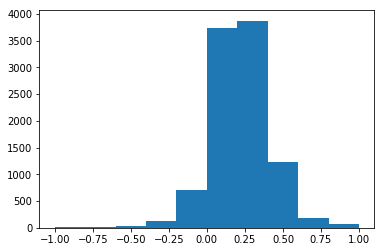

In [22]:
plt.hist(aws.polarity)

In [33]:
print("Nombre d'entrée négative d'après text blob :")
print(aws.polarity.loc[aws.polarity < 0].count())


Nombre d'entrée négative d'après text blob :
883
<class 'pandas.core.frame.DataFrame'>


In [ ]:
Scinder le DF en deux : Positif et négatif

In [21]:
aws.head()

,review,sentiment,Token,clean review,len,empty,polarity
0,Very soft and comfortable and warmer than it l...,positive,"(very, soft, and, comfortable, and, warmer, th...",very soft comfortable warm look fit full perfe...,10,False,0.480000
1,This is a product well worth the purchase. I ...,positive,"(this, is, a, product, well, worth, the, purch...",well worth find else positive ingenious lose l...,19,False,0.364222
2,All of my kids have cried non-stop when I trie...,positive,"(all, of, my, kids, have, cried, non, -, stop,...",cry non stop when try ween find love easy work...,22,False,0.558333
3,"When the Binky Fairy came to our house, we did...",positive,"(when, the, binky, fairy, came, to, our, house...",when come special help explain how important s...,25,False,0.459592
4,"Lovely book, it's bound tightly so you may not...",positive,"(lovely, book, ,, it, 's, bound, tightly, so, ...",lovely bind tightly able add aside designate p...,11,False,0.400000


In [67]:
aws.drop(['Token'],axis=1)
aws.drop(['len'],axis=1)
aws.drop(['empty'],axis=1)

DF_neg = aws.loc[aws.sentiment == "negative"]
DF_pos = aws.loc[aws.sentiment == "positive"]


In [68]:
print(DF_neg.count())
print(" ")
print(DF_pos.count())
print(" ")
print(DF_neg.info())
print(" ")
print(DF_pos.info())

review          2107
sentiment       2107
Token           2107
clean review    2107
len             2107
empty           2107
polarity        2107
dtype: int64
 
review          7862
sentiment       7862
Token           7862
clean review    7862
len             7862
empty           7862
polarity        7862
dtype: int64
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 18 to 9991
Data columns (total 7 columns):
review          2107 non-null object
sentiment       2107 non-null object
Token           2107 non-null object
clean review    2107 non-null object
len             2107 non-null int64
empty           2107 non-null bool
polarity        2107 non-null float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 117.3+ KB
None
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7862 entries, 0 to 9998
Data columns (total 7 columns):
review          7862 non-null object
sentiment       7862 non-null object
Token           7862 non-null object
clean review   

In [ ]:
Vérification des DF avec text blob

In [69]:
print("Nombre d'entrée négative dans le df negatif d'après text blob :")
print(DF_neg.polarity.loc[DF_neg.polarity < 0].count())
print(" ")
print("Nombre d'entrée négative dans le df negatif d'après text blob :")
print(DF_pos.polarity.loc[DF_pos.polarity < 0].count())

Nombre d'entrée négative dans le df negatif d'après text blob :
578
 
Nombre d'entrée négative dans le df negatif d'après text blob :
305


In [ ]:
Création du jeu de test avec données brutes et données clean (spacy)
Plafond 2107 entrées

In [70]:
review = DF_neg['review']
sentiment = DF_neg['sentiment']
clean_review = DF_neg['clean review']

#On fait un shuffle pour le positif avant de sélectionner que 2107 lignes
import sklearn
DF_pos= sklearn.utils.shuffle(DF_pos)

review1 = DF_pos['review'].iloc[0:2107,]
sentiment1 = DF_pos['sentiment'].iloc[0:2107,]
clean_review1 = DF_pos['clean review'].iloc[0:2107,]

test =pd.concat([review,review1], ignore_index=True)
test2 = pd.concat([clean_review, clean_review1], ignore_index=True)
test3 = pd.concat([sentiment, sentiment1], ignore_index=True)

test_jeu_brut = pd.DataFrame(test)
test_jeu_brut['sentiment'] = test3

test_jeu_clean = pd.DataFrame(test2)
test_jeu_clean['sentiment']=test3


In [80]:
test_jeu_brut.reset_index(drop = True, inplace = True)
test_jeu_clean.reset_index(drop = True, inplace = True)

print(test_jeu_brut.head())
print(" ")
print(test_jeu_clean.head())
print(" ")
print(test_jeu_brut.info())
print(" ")
print(test_jeu_clean.info())
print(" ")

print(test_jeu_brut.groupby(['sentiment']).count())
print(" ")
print(test_jeu_clean.groupby(['sentiment']).count())
print(" ")

                                              review sentiment
0  I only purchased a second-year calendar for my...  negative
1  This bear is absolutely adorable and I would g...  negative
2  This book is boring. Nothing to stimulate my g...  negative
3  The reason:Small sizeHard to apply on the wall...  negative
4  Would not purchase again or recommend. The dec...  negative
 
                                        clean review sentiment
0  only purchase second really disappoint availab...  negative
1  absolutely adorable give actually giggle growl...  negative
2                        boring stimulate recommend   negative
3  small apply most only know how waste when seco...  negative
4  purchase again recommend thick almost plastic ...  negative
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107 entries, 0 to 2106
Data columns (total 2 columns):
review       2107 non-null object
sentiment    2107 non-null object
dtypes: object(2)
memory usage: 33.0+ KB
None
 
<class 'pandas.cor

In [115]:
#Passage des données en catégorie
test_jeu_brut['sentiment'] = test_jeu_brut['sentiment'].astype('category')
test_jeu_clean['sentiment'] = test_jeu_clean['sentiment'].astype('category')


test_jeu_brut['sentiment'] = test_jeu_brut['sentiment'] == "positive"
test_jeu_clean['sentiment'] = test_jeu_clean['sentiment'] == "positive"


print(test_jeu_brut.head())
print(" ")
print(test_jeu_clean.head())






                                              review  sentiment
0  I only purchased a second-year calendar for my...      False
1  This bear is absolutely adorable and I would g...      False
2  This book is boring. Nothing to stimulate my g...      False
3  The reason:Small sizeHard to apply on the wall...      False
4  Would not purchase again or recommend. The dec...      False
 
                                        clean review  sentiment
0  only purchase second really disappoint availab...      False
1  absolutely adorable give actually giggle growl...      False
2                        boring stimulate recommend       False
3  small apply most only know how waste when seco...      False
4  purchase again recommend thick almost plastic ...      False


In [116]:
test_jeu_brut.info()
print(" ")
test_jeu_clean.info()
print(" ")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 2 columns):
review       4214 non-null object
sentiment    4214 non-null bool
dtypes: bool(1), object(1)
memory usage: 37.1+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 2 columns):
clean review    4214 non-null object
sentiment       4214 non-null bool
dtypes: bool(1), object(1)
memory usage: 37.1+ KB
 


In [ ]:
#Définition de la performance
def show_metrics(y_true, y_score):
    # True positive
    tp = np.sum(y_true * y_score)
    # False positive
    fp = np.sum((y_true == 0) * y_score)
    # True negative
    tn = np.sum((y_true==0) * (y_score==0))
    # False negative
    fn = np.sum(y_true * (y_score==0))

    # True positive rate (sensitivity or recall)
    tpr = tp / (tp + fn)
    # False positive rate (fall-out)
    fpr = fp / (fp + tn)
    # Precision
    precision = tp / (tp + fp)
    # True negatvie tate (specificity)
    tnr = 1 - fpr
    # F1 score
    f1 = 2*tp / (2*tp + fp + fn)
    # ROC-AUC for binary classification
    auc = (tpr+tnr) / 2

    print("True positive: ", tp)
    print("False positive: ", fp)
    print("True negative: ", tn)
    print("False negative: ", fn)

    print("True positive rate (recall): ", tpr)
    print("False positive rate: ", fpr)
    print("Precision: ", precision)
    print("True negative rate: ", tnr)
    print("F1: ", f1)
    print("ROC-AUC: ", auc)


In [ ]:
#Visualisation AUC-ROC
def roc_auc_score(y_true, y_pred):
    unique_vals = list(np.sort(np.unique(y_pred))) + [1]
    area_under_curve = 0
    fpr_points, tpr_points = [], []
    for i, th in enumerate(unique_vals):
        y_pred_th = np.zeros(len(y_pred))
        y_pred_th[y_pred >= th] = 1.0
        
        tp = np.sum(y_test * y_pred_th)
        fp = np.sum((y_test == 0) * y_pred_th)
        tn = np.sum((y_test==0) * (y_pred_th==0))
        fn = np.sum(y_test * (y_pred_th==0))
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        fpr_points.append(fpr)
        tpr_points.append(tpr)
        
        if i > 0:
            area_under_curve += (fpr_prev - fpr) * tpr
        fpr_prev = fpr
        
    plt.figure(figsize=(5, 5), dpi=100)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
# Import functions to compute accuracy and split data 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
 
# Import models, including VotingClassifier meta-model 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier 

#test_jeu_clean.clean_review / test_jeu_clean.clean_review
#test_jeu_brut.review / test_jeu_brut.sentiment

X_train, X_test, y_train, y_test = train_test_split(test_jeu_brut.review, test_jeu_brut.sentiment, test_size=0.2,  random_state= SEED)

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.fit_transform(X_test)

LR = LogisticRegression ()
RFC = RandomForestClassifier()
MNB = MultinomialNB()
SVC =  SVC()

CLASS = VotingClassifier(estimators=[('RFC',RFC), ('MNB',MNB), ('SVC',SVC)], voting='soft')
pipeclf = Pipeline([('CLASS', CLASS)])
                     
pipeclf.fit(X_train, y_train)

## Training Predictions
proba = pipeclf.predict(X_test)

